In [64]:

import sys
!{sys.executable} -m pip install -r requirements.txt



ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'Fillings/requirements.txt'
You should consider upgrading via the '/Users/layalalzaydi/Desktop/Fillings/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from tqdm import tqdm
import pandas as pd
import pprint
import project_helper

import lxml

from pymongo import MongoClient


import pymongo  # package for working with MongoDB



from bs4 import BeautifulSoup
import re
import datetime

# import pyspark



import Stocklist



import re

from requests import get


from collections import Counter 


import re, requests

import numpy as np









In [3]:
cik_lookup = {
    'AMZN': '1018724',
'BMY': '0000014272',   
    'CNP': '0001130310',
    'CVX': '0000093410',
    'FL': '0000850209',
    'FRT': '0000034903',
    'HON': '0000773840'}

In [4]:
sec_api = project_helper.SecAPI()


In [5]:
%psource project_helper


In [7]:
def get_sec_data(cik, doc_type='',dateb='', owner='include', start=0, count=100,search_text=''):
    newest_pricing_data = pd.to_datetime('2020-07-01')

    
    
    rss_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany' \
        '&CIK={}&type={}&dateb={}&owner={}&count={}&search_text={}&output=atom' \
        .format(cik, doc_type, dateb, owner , start ,count , search_text)
    
    print(rss_url)
    
    
    sec_data = sec_api.get(rss_url)
    feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
    entries = [
        (
            
            entry.content.find('filing-date').getText())
        for entry in feed.find_all('entry', recursive=False)
        
        if pd.to_datetime(entry.content.find('filing-date').getText()) >= newest_pricing_data]
    print (entries)

    return entries
    


In [8]:
def get_sec_data_from_link(link):
    newest_pricing_data = pd.to_datetime('2020-07-01')


    
    sec_data = sec_api.get(link)
    feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
    if feed is not None:
        entries = [
            (

                entry.content.find('filing-date').getText())
            for entry in feed.find_all('entry', recursive=False)

            if pd.to_datetime(entry.content.find('filing-date').getText()) >= newest_pricing_data]
        print (entries)

        return entries
    


In [9]:
def generate_link(cik, doc_type='',dateb='', owner='include', start=0, count=100,search_text=''):
    newest_pricing_data = pd.to_datetime('2020-07-01')

    rss_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany' \
        '&CIK={}&type={}&dateb={}&owner={}&count={}&search_text={}&output=atom' \
        .format(cik, doc_type, dateb, owner , start ,count , search_text)
    return rss_url
    

In [16]:
cik_csv = pd.read_csv (r'/Users/layalalzaydi/Desktop/Fillings/app/appData/cik.csv')
cik_csv = cik_csv.drop(columns=['Unnamed: 0'])
cik_csv['Link']= ""
cik_csv = cik_csv.set_index('ticker')
# loop pver the cik get it inot the function and put the return into the link column 
for CIK in cik_csv.cik:
    link = generate_link(CIK)
    cik_csv.loc[cik_csv['cik'] == CIK, 'Link'] = link
    

In [17]:
cik_csv.to_csv('allinfo.csv')
    

In [18]:
def get_sec_CIK_From_Ticker(tickers):
    
    cik_dict = {}
    
    for ticker in tickers:
        URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany&output=atom'.format(ticker)

#         print(URL)


        sec_data = sec_api.get(URL)
        feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
        
        print(type(feed))
        
        if feed is not None:
            result = feed.find('cik')

            print(len(result))
            print(result)

            if len(result):

                cik_dict[str(ticker).upper()] = result.get_text()

            print(result.get_text())
    

    return cik_dict

In [19]:
# example_ticker = 'AMZN'
sec_data = {}
for index in cik_csv.iterrows():
    print(index[1].Link)
    sec_data[index[0]] = get_sec_data_from_link(index[1].Link)

https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1090872&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1675149&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-29', '2020-07-20', '2020-07-15', '2020-07-13', '2020-07-08', '2020-07-08', '2020-07-07', '2020-07-07', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1555074&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=706688&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?

['2020-08-03', '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-24', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1703056&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-23', '2020-07-23', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=2230&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-23', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=2178&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1002910&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-10', '20

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-11', '2020-08-03', '2020-08-03', '2020-07-09', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=819793&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1604738&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-31', '2020-07-31', '2020-07-24', '2020-07-13', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1778114&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-16', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1750&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-22', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec

['2020-08-13', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1129137&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-28', '2020-07-21', '2020-07-20', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=820027&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-05', '2020-07-30', '2020-07-10', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1411906&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-14', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1533924&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-13', '2020-08-10', '2020-08-07', '2020-08-05'

['2020-08-11', '2020-07-29', '2020-07-29', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1498068&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-09', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1305168&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1037676&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-28', '2020-07-28', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1508478&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-07-10', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1689662&type=&dateb=&owner=inclu

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=731802&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=896622&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-07-31', '2020-07-30', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1606457&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-28', '2020-07-09', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1702780&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-03',

['2020-08-12', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866787&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-06', '2020-08-04', '2020-08-04', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1633438&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1432364&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-08', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=8947&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-15', '

['2020-08-11', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-29', '2020-07-29', '2020-07-20', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=312069&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-29', '2020-07-29', '2020-07-13', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1655050&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9521&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1506289&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=913142&type=&dateb=&owner=include&count=0&search_text=100&outp

['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-28', '2020-07-27', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=885590&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-27', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=863436&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1160864&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1108134&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-10', '2020-07-30', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=811809&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['20

['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=14272&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-04', '2020-07-30', '2020-07-16', '2020-07-16', '2020-07-13', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1634117&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-23', '2020-07-21', '2020-07-21', '2020-07-20', '2020-07-15', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9631&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137390&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03']
https://www.sec.

['2020-08-10', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-08', '2020-07-06', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=946454&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-12', '2020-08-10', '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-29', '2020-07-27', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=925683&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1528437&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1064728&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-08-03', '2020-07-17', '2020-07-17', '2020-07-16', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1379384&type=&da

['2020-08-05', '2020-08-04', '2020-08-03', '2020-07-30', '2020-07-28', '2020-07-27', '2020-07-27', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1536196&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-05', '2020-07-27', '2020-07-24', '2020-07-24', '2020-07-20', '2020-07-17', '2020-07-15', '2020-07-10', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1725123&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=312070&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1538849&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-27', '2020-07-2

['2020-08-14', '2020-08-11', '2020-08-10', '2020-08-03', '2020-07-29', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=929545&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-03', '2020-07-23', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=761648&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-07', '2020-07-28', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1306830&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-04', '2020-07-29', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1030475&type=&dateb=&owner=include&count=0&search_text=100&output=atom


['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06', '2020-07-31', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1739940&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-06', '2020-07-30', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=24090&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-07', '2020-08-07', '2020-08-05', '2020-08-05', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1071371&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-29', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=936395&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-06', '2020-08-05', '2020-07-29', '2020-07-24', '2020-07-21', '2020-07-21', '2020-07-17', '2020-07-17', '2020-07-17']
https://www.se

['2020-08-14', '2020-07-29', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-22', '2020-07-21', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=26172&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-28', '2020-07-28', '2020-07-09', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=766701&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-04', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1227654&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04', '2020-07-10', '2020-07-07', '2020-07-07', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1503584&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-28', 

['2020-08-13', '2020-08-11', '2020-08-07', '2020-07-30', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1345105&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1221029&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-24', '2020-07-24', '2020-07-20', '2020-07-13', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=16732&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=928022&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-05', '2020-08-04', '2020-07-10', '2020-07-02']
https://www.se

KeyboardInterrupt: 

In [14]:
len(sec_data)

sec_data
import json
app_json = json.dumps(sec_data)

print(app_json)

with open('AllData.json', 'w') as json_file:
    json.dump(sec_data, json_file)

{}


In [15]:
cikamzn = get_sec_CIK_From_Ticker(x)

NameError: name 'x' is not defined

In [147]:
# len(cikamzn)

# len(cikamzn.values())
len(cikamzn)

type(cikamzn)


cikamzn

{'A': '0001090872',
 'AA': '0001675149',
 'AAMC': '0001555074',
 'AAN': '0000706688',
 'AAP': '0001158449',
 'AAT': '0001500217',
 'AAU': '0001015647',
 'AB': '0000825313',
 'ABB': '0001091587',
 'ABBV': '0001551152',
 'ABC': '0001140859',
 'ABEV': '0001565025',
 'ABG': '0001144980',
 'ABM': '0000771497',
 'ABR': '0001253986',
 'ABT': '0000001800',
 'AC': '0001642122',
 'ACA': '0001739445',
 'ACB': '0001683541',
 'ACC': '0001283630',
 'ACCO': '0000712034',
 'ACEL': '0001698991',
 'ACH': '0001161611',
 'ACI': '0001646972',
 'ACM': '0000868857',
 'ACN': '0001467373',
 'ACP': '0001503290',
 'ACRE': '0001529377',
 'ACU': '0000002098',
 'ACV': '0001636289',
 'ACY': '0001036848',
 'ADC': '0000917251',
 'ADCT': '0001771910',
 'ADM': '0000007084',
 'ADNT': '0001670541',
 'ADS': '0001101215',
 'ADSW': '0001585790',
 'ADT': '0001703056',
 'ADX': '0000002230',
 'AE': '0000002178',
 'AEE': '0001002910',
 'AEF': '0000846676',
 'AEG': '0000769218',
 'AEL': '0001039828',
 'AEM': '0000002809',
 'AEO':

In [148]:
 dataCIK = pd.DataFrame(cikamzn.items(), columns=['ticker', 'cik'])

In [149]:
dataCIK

,ticker,cik
0,A,0001090872
1,AA,0001675149
2,AAMC,0001555074
3,AAN,0000706688
4,AAP,0001158449
...,...,...
5755,ZSAN,0001587221
5756,ZUMZ,0001318008
5757,ZVO,0001305323
5758,ZYNE,0001621443


In [156]:
dataCIK.set_index('ticker')

,cik
ticker,
A,0001090872
AA,0001675149
AAMC,0001555074
AAN,0000706688
AAP,0001158449
...,...
ZSAN,0001587221
ZUMZ,0001318008
ZVO,0001305323


In [151]:
csv_cik = dataCIK.to_csv('./cik.csv')


In [20]:
import json
app_json = json.dumps(cikamzn)
print(cikamzn)

with open('ticksvsciks2.json', 'w') as json_file:
    json.dump(cikamzn, json_file)

NameError: name 'cikamzn' is not defined

In [175]:
for k in sec_data.keys():
    sec_data[k] = Counter(sec_data[k])
    print(Counter(sec_data[k]))

Counter({'2020-08-05': 5, '2020-07-31': 2, '2020-08-10': 1, '2020-07-30': 1, '2020-07-02': 1})
Counter({'2020-08-06': 2, '2020-07-16': 2, '2020-07-06': 2, '2020-08-04': 1, '2020-07-30': 1, '2020-07-13': 1, '2020-07-02': 1})
Counter({'2020-07-30': 3, '2020-08-06': 2, '2020-07-31': 2, '2020-08-03': 1, '2020-07-20': 1, '2020-07-06': 1})
Counter({'2020-08-11': 4, '2020-08-13': 2, '2020-08-10': 2, '2020-08-06': 1, '2020-08-05': 1})
Counter({'2020-07-06': 5, '2020-08-03': 2, '2020-08-10': 1, '2020-07-23': 1, '2020-07-16': 1})
Counter({'2020-08-05': 2, '2020-08-10': 1})
Counter({'2020-08-03': 3, '2020-07-28': 2, '2020-08-05': 1, '2020-08-04': 1, '2020-07-30': 1, '2020-07-29': 1, '2020-07-24': 1})


In [13]:
DEFAULT_TICKERS = ['goog', 'aapl']
URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
CIK_RE = re.compile(r'.*CIK=(\d{10}).*')

cik_dict = {}
for ticker in DEFAULT_TICKERS:
    results = CIK_RE.findall(get(URL.format(ticker)).content)
    if len(results):
        cik_dict[str(ticker).lower()] = str(results[0])
f = open('cik_dict', 'w')
dump(cik_dict, f)
f.close()

In [47]:
raw_fillings_by_ticker = {}

for ticker, data in sec_data.items():
    raw_fillings_by_ticker[ticker] = {}
    for index_url, file_type, file_date in tqdm(data, desc='Downloading {} Fillings'.format(ticker), unit='filling'):
        if (file_type == '10-K'):
            file_url = index_url.replace('-index.htm', '.txt').replace('.txtl', '.txt')            
            
            raw_fillings_by_ticker[ticker][file_date] = sec_api.get(file_url)


print('Example Document:\n\n{}...'.format(next(iter(raw_fillings_by_ticker[example_ticker].values()))[:1000]))

Example Document:

-----BEGIN PRIVACY-ENHANCED MESSAGE-----
Proc-Type: 2001,MIC-CLEAR
Originator-Name: webmaster@www.sec.gov
Originator-Key-Asymmetric:
 MFgwCgYEVQgBAQICAf8DSgAwRwJAW2sNKK9AVtBzYZmr6aGjlWyK3XmZv3dTINen
 TWSM7vrzLADbmYQaionwg5sDW3P6oaM5D3tdezXMm7z1T+B+twIDAQAB
MIC-Info: RSA-MD5,RSA,
 JheN9rrH0LADcPLNpdgic2Y+wa34llXqe750TowVzUFLd6IuuNQne2H0axAosYFz
 1Lmg9dJfEMxBnv2E6NCBrw==

<SEC-DOCUMENT>0001193125-05-047032.txt : 20050311
<SEC-HEADER>0001193125-05-047032.hdr.sgml : 20050311
<ACCEPTANCE-DATETIME>20050311062027
ACCESSION NUMBER:		0001193125-05-047032
CONFORMED SUBMISSION TYPE:	10-K
PUBLIC DOCUMENT COUNT:		9
CONFORMED PERIOD OF REPORT:	20041231
FILED AS OF DATE:		20050311
DATE AS OF CHANGE:		20050311

FILER:

	COMPANY DATA:	
		COMPANY CONFORMED NAME:			AMAZON COM INC
		CENTRAL INDEX KEY:			0001018724
		STANDARD INDUSTRIAL CLASSIFICATION:	RETAIL-CATALOG & MAIL-ORDER HOUSES [5961]
		IRS NUMBER:				911646860
		STATE OF INCORPORATION:			DE
		FISCAL YEAR END:			1231

	FILING VA

In [3]:
DEFAULT_TICKERS = ['goog', 'aapl','amzn']
URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
CIK_RE = re.compile(r'.*CIK=(\d{10}).*')

cik_dict = {}
for ticker in DEFAULT_TICKERS:
    results = CIK_RE.findall(get(URL.format(ticker)).content)
    if len(results):
        cik_dict[str(ticker).lower()] = str(results[0])
f = open('cik_dict', 'w')
dump(cik_dict, f)
f.close()

In [129]:

def getCIKs(TICKERS):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    cik_dict = {}
    for ticker in TICKERS:
        print(URL.format(ticker))
        f = sec_api.get(URL.format(ticker))
        
#         f = requests.get(URL.format(ticker), stream = True)
        results = CIK_RE.findall(f.text)
        print(cik_dict)
    
        if len(results):
            results[0] = int(re.sub('\.[0]*', '.', results[0]))
            cik_dict[str(ticker).upper()] = str(results[0])
    
    print(cik_dict)
    

getCIKs(['wmt','amzn','nflx'])

http://www.sec.gov/cgi-bin/browse-edgar?CIK=wmt&Find=Search&owner=exclude&action=getcompany


AttributeError: 'str' object has no attribute 'text'

In [27]:
y = getCIKs(x)

AttributeError: 'unicode' object has no attribute 'text'

In [302]:
def StockList():
        StocksController = Stocklist.NasdaqController(True)
        list_of_tickers = StocksController.getList()

        print(list_of_tickers)
        print(len(list_of_tickers))
        return list_of_tickers

In [303]:
x = StockList()

['A', 'AA', 'AAMC', 'AAN', 'AAP', 'AAT', 'AAU', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABR$A', 'ABR$B', 'ABR$C', 'ABT', 'AC', 'ACA', 'ACB', 'ACC', 'ACCO', 'ACEL', 'ACH', 'ACI', 'ACM', 'ACN', 'ACND.U', 'ACP', 'ACRE', 'ACU', 'ACV', 'ACY', 'ADC', 'ADCT', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AE', 'AEB', 'AEE', 'AEF', 'AEFC', 'AEG', 'AEL', 'AEL$A', 'AEL$B', 'AEM', 'AEO', 'AEP', 'AEP$B', 'AER', 'AES', 'AFB', 'AFC', 'AFG', 'AFGB', 'AFGC', 'AFGD', 'AFGH', 'AFI', 'AFL', 'AFT', 'AG', 'AGCO', 'AGD', 'AGE', 'AGI', 'AGM', 'AGM$A', 'AGM$C', 'AGM$D', 'AGM$E', 'AGM.A', 'AGO', 'AGO$B', 'AGO$E', 'AGO$F', 'AGR', 'AGRO', 'AGS', 'AGX', 'AHC', 'AHH', 'AHH$A', 'AHL$C', 'AHL$D', 'AHL$E', 'AHT', 'AHT$D', 'AHT$F', 'AHT$G', 'AHT$H', 'AHT$I', 'AI', 'AI$B', 'AI$C', 'AIC', 'AIF', 'AIG', 'AIG$A', 'AIG.W', 'AIM', 'AIN', 'AINC', 'AIO', 'AIR', 'AIRI', 'AIT', 'AIV', 'AIW', 'AIZ', 'AIZP', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKO.A', 'AKO.B', 'AKR', 'AL', 'AL$A', 'ALB', 'ALC', 'ALE', 'ALEX', 'ALG', 'A

In [304]:
x

['A',
 'AA',
 'AAMC',
 'AAN',
 'AAP',
 'AAT',
 'AAU',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABEV',
 'ABG',
 'ABM',
 'ABR',
 'ABR$A',
 'ABR$B',
 'ABR$C',
 'ABT',
 'AC',
 'ACA',
 'ACB',
 'ACC',
 'ACCO',
 'ACEL',
 'ACH',
 'ACI',
 'ACM',
 'ACN',
 'ACND.U',
 'ACP',
 'ACRE',
 'ACU',
 'ACV',
 'ACY',
 'ADC',
 'ADCT',
 'ADM',
 'ADNT',
 'ADS',
 'ADSW',
 'ADT',
 'ADX',
 'AE',
 'AEB',
 'AEE',
 'AEF',
 'AEFC',
 'AEG',
 'AEL',
 'AEL$A',
 'AEL$B',
 'AEM',
 'AEO',
 'AEP',
 'AEP$B',
 'AER',
 'AES',
 'AFB',
 'AFC',
 'AFG',
 'AFGB',
 'AFGC',
 'AFGD',
 'AFGH',
 'AFI',
 'AFL',
 'AFT',
 'AG',
 'AGCO',
 'AGD',
 'AGE',
 'AGI',
 'AGM',
 'AGM$A',
 'AGM$C',
 'AGM$D',
 'AGM$E',
 'AGM.A',
 'AGO',
 'AGO$B',
 'AGO$E',
 'AGO$F',
 'AGR',
 'AGRO',
 'AGS',
 'AGX',
 'AHC',
 'AHH',
 'AHH$A',
 'AHL$C',
 'AHL$D',
 'AHL$E',
 'AHT',
 'AHT$D',
 'AHT$F',
 'AHT$G',
 'AHT$H',
 'AHT$I',
 'AI',
 'AI$B',
 'AI$C',
 'AIC',
 'AIF',
 'AIG',
 'AIG$A',
 'AIG.W',
 'AIM',
 'AIN',
 'AINC',
 'AIO',
 'AIR',
 'AIRI',
 'AIT',
 'AIV',
 'AIW',
 'AIZ',

In [28]:
def new_dataframe():
    
    StocksController = Stocklist.NasdaqController(True)
    list_of_tickers = StocksController.getList()

    
    index = pd.date_range(start='2020-07-01', end='today')
    df = pd.DataFrame(0,index = index, columns = list_of_tickers)
    df.tail()
    return df

In [216]:
# def populate(df):
#     for TKR , x in sec_data.items():
#         for i,num in x.items():
#             df.loc[i, TKR] = num
#     return df;

In [27]:
def populate_all(df):
    for TKR , x in data.items():
        if x:
            for i,num in x.items():
                df.loc[i, TKR] = num
    return df;

In [221]:
def append_TKR(newTRK_list, df):
    TKR_LIST = list(df.columns)
    TKR_LIST_diference = list(set(newTRK_list) - set(TKR_LIST))
    for i in TKR_LIST_diference:
        df.assign(ColName='i')
    return df

In [ ]:
def append_day():
    

In [29]:
#chnage the csv to a dictionary to pass it throught the counter 
import json
with open(r'/Users/layalalzaydi/Desktop/Fillings/app/appData/AllData.json') as f:
    data = json.load(f)

for k in data.keys():
    data[k] = Counter(data[k])
    print(Counter(data[k]))
    
df_all = new_dataframe()

df_all_new = populate_all(df_all)



  
    
# cik_csv = pd.read_csv (r'/Users/layalalzaydi/Desktop/Fillings/cik.csv')
# cik_csv = cik_csv.drop(columns=['Unnamed: 0'])
# cik_csv['Link']= ""
# cik_csv = cik_csv.set_index('ticker')
# # loop pver the cik get it inot the function and put the return into the link column 
# for CIK in cik_csv.cik:
#     link = generate_link(CIK)
#     cik_csv.loc[cik_csv['cik'] == CIK, 'Link'] = link
    

Counter({'2020-08-05': 5, '2020-08-03': 1, '2020-07-31': 1, '2020-07-01': 1})
Counter({'2020-07-07': 3, '2020-07-08': 2, '2020-08-07': 1, '2020-07-29': 1, '2020-07-20': 1, '2020-07-15': 1, '2020-07-13': 1})
Counter({'2020-08-14': 2})
Counter({'2020-08-04': 8, '2020-08-14': 1, '2020-08-12': 1})
Counter({'2020-07-08': 7, '2020-07-23': 2, '2020-08-13': 1})
Counter({'2020-07-31': 1, '2020-07-28': 1, '2020-07-09': 1})
Counter({'2020-07-01': 2, '2020-08-11': 1, '2020-08-07': 1, '2020-08-06': 1, '2020-08-05': 1, '2020-07-23': 1})
Counter({'2020-07-23': 2, '2020-08-11': 1, '2020-08-10': 1, '2020-07-13': 1, '2020-07-06': 1})
Counter({'2020-08-04': 1, '2020-07-22': 1, '2020-07-01': 1})
Counter({'2020-07-02': 3, '2020-08-04': 1, '2020-07-31': 1, '2020-07-29': 1, '2020-07-08': 1})
Counter({'2020-08-05': 2, '2020-08-03': 2, '2020-07-10': 2, '2020-07-28': 1, '2020-07-21': 1, '2020-07-16': 1, '2020-07-07': 1})
Counter({'2020-07-30': 3, '2020-08-10': 2, '2020-07-13': 2, '2020-07-07': 2, '2020-08-12': 

Counter({'2020-07-31': 1, '2020-07-30': 1, '2020-07-29': 1})
Counter({'2020-08-03': 3, '2020-07-30': 3, '2020-07-17': 2, '2020-08-07': 1, '2020-08-04': 1})
Counter({'2020-08-03': 2, '2020-07-13': 1})
Counter({'2020-08-05': 2, '2020-08-06': 1, '2020-07-02': 1})
Counter({'2020-08-05': 2})
Counter({'2020-08-06': 2, '2020-07-24': 1})
Counter({'2020-08-05': 1, '2020-07-24': 1, '2020-07-13': 1})
Counter()
Counter({'2020-08-04': 2, '2020-07-17': 2, '2020-08-14': 1, '2020-08-06': 1, '2020-08-03': 1, '2020-07-22': 1, '2020-07-21': 1, '2020-07-10': 1})
Counter({'2020-08-04': 2, '2020-07-17': 2, '2020-08-14': 1, '2020-08-06': 1, '2020-08-03': 1, '2020-07-22': 1, '2020-07-21': 1, '2020-07-10': 1})
Counter({'2020-08-07': 1, '2020-07-31': 1})
Counter({'2020-08-07': 1, '2020-08-06': 1, '2020-07-27': 1})
Counter({'2020-08-05': 1, '2020-07-24': 1, '2020-07-13': 1})
Counter({'2020-08-07': 1, '2020-08-06': 1, '2020-08-05': 1})
Counter({'2020-08-12': 3, '2020-08-13': 2, '2020-08-05': 2, '2020-08-04': 1, '

Counter({'2020-07-22': 1, '2020-07-15': 1})
Counter({'2020-07-06': 2, '2020-08-13': 1, '2020-07-17': 1, '2020-07-15': 1, '2020-07-10': 1, '2020-07-09': 1, '2020-07-01': 1})
Counter({'2020-08-06': 2, '2020-08-13': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-10': 1})
Counter({'2020-07-22': 3, '2020-07-10': 3, '2020-07-14': 2, '2020-08-13': 1, '2020-07-13': 1})
Counter({'2020-08-10': 1, '2020-08-07': 1})
Counter({'2020-08-10': 1, '2020-08-05': 1, '2020-07-21': 1})
Counter({'2020-07-06': 1, '2020-07-02': 1})
Counter({'2020-08-05': 2, '2020-07-31': 2, '2020-08-14': 1, '2020-08-10': 1, '2020-08-06': 1, '2020-08-04': 1, '2020-08-03': 1})
Counter({'2020-08-13': 2, '2020-08-10': 2, '2020-07-02': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-07-17': 1, '2020-07-13': 1})
Counter({'2020-08-06': 2, '2020-08-12': 1})
Counter({'2020-08-04': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-08-10': 1, '2020-08-06': 1, '2020-07-30': 1, '2020-07-22': 1, '2020-07-09': 1})
Counter({'2020-08-11': 5, '2020-08-14': 

Counter({'2020-08-06': 2, '2020-07-14': 1, '2020-07-13': 1, '2020-07-01': 1})
Counter({'2020-08-06': 2, '2020-08-05': 2, '2020-07-22': 2, '2020-08-12': 1, '2020-07-17': 1})
Counter({'2020-08-14': 1, '2020-07-23': 1})
Counter({'2020-08-14': 3, '2020-08-04': 2, '2020-07-31': 1, '2020-07-06': 1})
Counter({'2020-08-12': 2, '2020-07-07': 2, '2020-08-14': 1, '2020-08-10': 1, '2020-07-24': 1, '2020-07-23': 1, '2020-07-13': 1, '2020-07-08': 1})
Counter({'2020-08-06': 1, '2020-08-05': 1, '2020-07-20': 1})
Counter({'2020-08-04': 1})
Counter({'2020-07-30': 3, '2020-08-03': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-07-24': 1, '2020-07-22': 1, '2020-07-17': 1})
Counter({'2020-07-10': 2, '2020-08-07': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-17': 1})
Counter({'2020-07-10': 2, '2020-08-07': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-17': 1})
Counter({'2020-08-06': 2, '2020-08-12': 1, '2020-08-10': 1, '2020-08-03': 1})
Counter({'2020-07-29': 2, '2020-08-12': 1, '2020-08-03': 1, '2020-07-30': 

In [30]:
df_all_new

,A,AA,AAMC,AAN,AAP,AAT,AAU,AB,ABB,ABBV,...,ZSAN,ZUMZ,ZVO,ZVZZC,ZVZZT,ZWZZT,ZXYZ.A,ZXZZT,ZYNE,ZYXI
2020-07-01,1,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-02,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2020-07-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-06,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-07,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-08,0,2,0,0,7,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
df_all_new.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/app/appData/BigPopulateddata.csv')

In [47]:
w = df_all_new.loc['2020-08-14',:]

In [52]:
w = w.sort_values(ascending=False)

<AxesSubplot:ylabel='Frequency'>

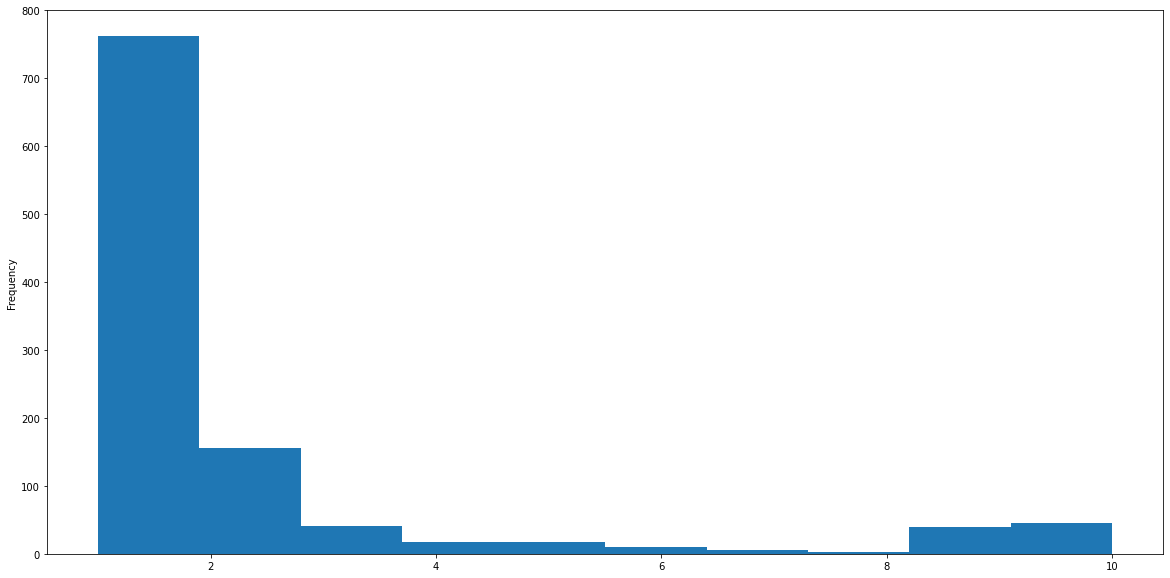

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
w.plot.hist()


In [46]:
dfnew = pd.DataFrame(index = df_all_new.columns(), w)

SyntaxError: positional argument follows keyword argument (<ipython-input-46-cddc57c90b53>, line 1)

In [49]:
type(w)
w = w[w > 0]

In [43]:
w.max()

10


## HERE 

In [125]:
import sqlite3

con = sqlite3.connect('Stocks.db')
con.execute("CREATE TABLE master(TKR PRIMARY KEY)")


In [152]:
def extractDigits(lst): 
    return list(map(lambda el:[el], lst)) 
      
              
# Driver code 
 
y = extractDigits(x)

y

con.executemany("INSERT  INTO master VALUES (?)", (y))
for row in con.execute("SELECT TKR FROM master"):
    print(row)

con.commit()
con.close()

ProgrammingError: Cannot operate on a closed database.

In [73]:
import pandas as pd 
import csv, sqlite3

#converte the list to df to csv 

df_stocks = pd.DataFrame({'TKR':x})
csv_data = df_stocks.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/Stocks.csv')

connection = sqlite3.connect('Stocks.db')
cursor = connection.cursor()
connection.execute("CREATE TABLE a (TKR TEXT PRIMARY KEY, LINK TEXT);") 

In [64]:
import pandas as pd 
import csv, sqlite3

#converte the list to df to csv 

df_stocks = pd.DataFrame({'TKR':x})
csv_data = df_stocks.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/Stocks.csv')

connection = sqlite3.connect('Stocks.db')
cursor = connection.cursor()
connection.execute("CREATE TABLE t (TKR);") 

with open('Stocks.csv',r'\Users\layalalzaydi\Desktop\Fillings\Stocks.csv') as fin: 
    dr = csv.DictReader(fin) 
    to_db = [(i['TKR']) for i in dr]

cursor.executemany("INSERT INTO t ('TKR') VALUES (?);", to_db)
connection.commit()
connection.close()

ValueError: invalid mode: '\Users\layalalzaydi\Desktop\Fillings\Stocks.csv'